In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

[]

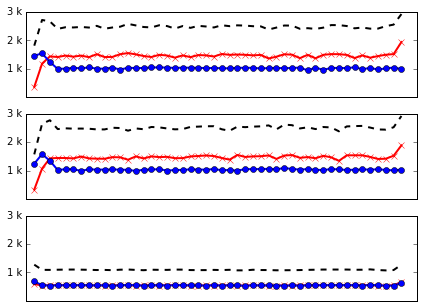

In [4]:
fig = plt.figure(figsize=(7,7))

###
ax = fig.add_subplot(411)
s = sum_throughput(glob.glob("../results-mode0-run0-baseline/mode0-run0-baseline-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("../results-mode0-run0-baseline/mode0-run0-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")

ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
ax.set_xticks([])

###
ax = fig.add_subplot(412)
s = sum_throughput(glob.glob("../results-mode1-run1-baseline/mode1-run1-baseline-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("../results-mode1-run1-baseline/mode1-run1-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")

ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
ax.set_xticks([])

###
ax = fig.add_subplot(413)
s = sum_throughput(glob.glob("../results-mode2-run2-baseline/mode2-run2-baseline-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("../results-mode2-run2-baseline/mode2-run2-baseline-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")

ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
ax.set_xticks([])

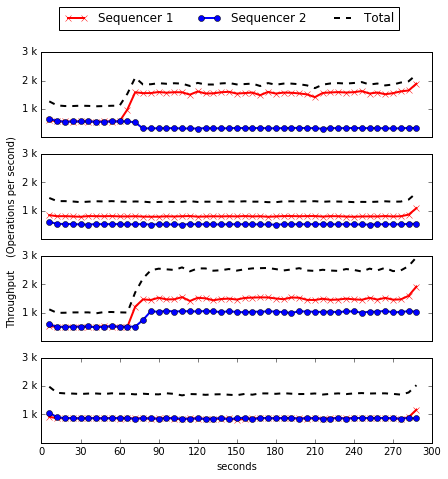

In [87]:
fig = plt.figure(figsize=(7,7))

###
ax = fig.add_subplot(411)
s = sum_throughput(glob.glob("wave1-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("wave1-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")
ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
ax.set_xticks([])

###
ax = fig.add_subplot(412)
s = sum_throughput(glob.glob("wave2-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Wave 2, Sequencer 1")

t = sum_throughput(glob.glob("wave2-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Wave 2, Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")
ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
ax.set_xticks([])
ax.set_ylabel("(Operations per second)")

###
ax = fig.add_subplot(413)
s = sum_throughput(glob.glob("proxy-all-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("proxy-all-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")
ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))

ax.set_xticks([])
ax.set_ylabel("Throughput")


###
ax = fig.add_subplot(414)
s = sum_throughput(glob.glob("proxy2wave-all-foreground-*throughput.csv"))
ax.plot(range(0, len(s['rate'])*6, 6), s['rate']/1000, 
        'r-', marker='x', linewidth=2.0, label="Sequencer 1")

t = sum_throughput(glob.glob("proxy2wave-all-issdm-*throughput.csv"))
ax.plot(range(0, len(t['rate'])*6, 6), t['rate']/1000, 
        'b-', marker='o', linewidth=2.0, label="Sequencer 2")

ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")
ax.set_ylim(0, 3)
ax.set_yticks([1, 2, 3])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))


###
ax.set_xlabel("seconds")
ax.set_xticks(range(0, 330, 30))
lgd = ax.legend(loc='center', ncol=3, bbox_to_anchor=(0.48, 5))
plt.savefig('mantle-balancer-profiles', dpi=300, bbox_inches='tight')